In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch as Patch
import numpy as np
import pandas as pd
import time
import os
import seaborn as sns
from scipy import stats
import sklearn.preprocessing as skp
import sklearn.cluster as skc
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture
from sklearn.model_selection import train_test_split
from scipy import linalg
import itertools
from joblib import dump, load

In [2]:
outdir = './data/processed_data'

## Restore GMM trained for Diabetese dataset 

In [17]:
gmm_filename = os.path.join(outdir, f"gmm_diabetese_trained.joblib" ) 

In [23]:
gmm_diabetese_loaded = load(gmm_filename)

In [24]:
gmm_diabetese_loaded.converged_

True

## Unsupervised Learning on PCA Reduced Diabetes Dataset

In [70]:
 # read data from the file and plot 
filename = os.path.join(outdir, f"reduced_diabetes_pca.csv" )    
X_reduced_pca = pd.read_csv(filename)

In [71]:
X_reduced_pca.shape

(183824, 5)

In [72]:
X_reduced_pca.head()

0          1          2         3         4
0  -6.337444  -1.447461  -1.190457  1.415162 -1.590803
1   8.935548 -19.853925  17.217871 -3.792815 -1.287537
2  19.521195   6.765617 -15.496631 -2.456653 -3.654196
3  -7.328086  -8.367197  -5.098674  0.553206 -0.736349
4  -5.793849  -0.442184  -1.030759 -2.254799  1.987619

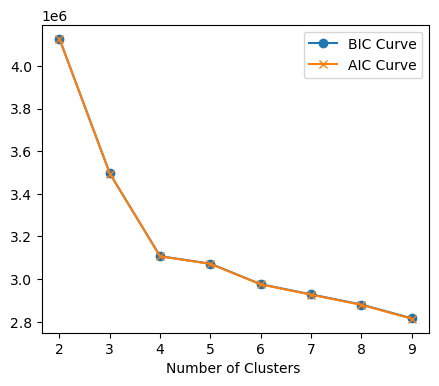

In [53]:
bic=[]
aic =[]
k_range = range(2,10)
for i in k_range:
    gmm_temp = GaussianMixture(n_components=i, n_init=10)
    gmm_temp.fit(X_reduced_pca)
    bic.append(gmm_temp.bic(X_reduced_pca))
    aic.append(gmm_temp.aic(X_reduced_pca))

fig1 = plt.figure(figsize = (5,4))
plt.plot(k_range, bic, marker='o', label = "BIC Curve")
plt.plot(k_range, aic, marker='x', label = "AIC Curve")
plt.xlabel("Number of Clusters ")
plt.legend()
plt.show()



In [73]:
gmm = GaussianMixture(n_components=7, n_init=10)

In [74]:
gmm.fit(X_reduced_pca)

GaussianMixture(n_components=7, n_init=10)

In [75]:
predictions = gmm.predict_proba(X_reduced_pca)

In [76]:
labels = gmm.predict(X_reduced_pca)

In [81]:
#X_reduced_pca['pred_prob'] = predictions
X_reduced_pca['labels'] = labels

In [78]:
gmm.converged_

True

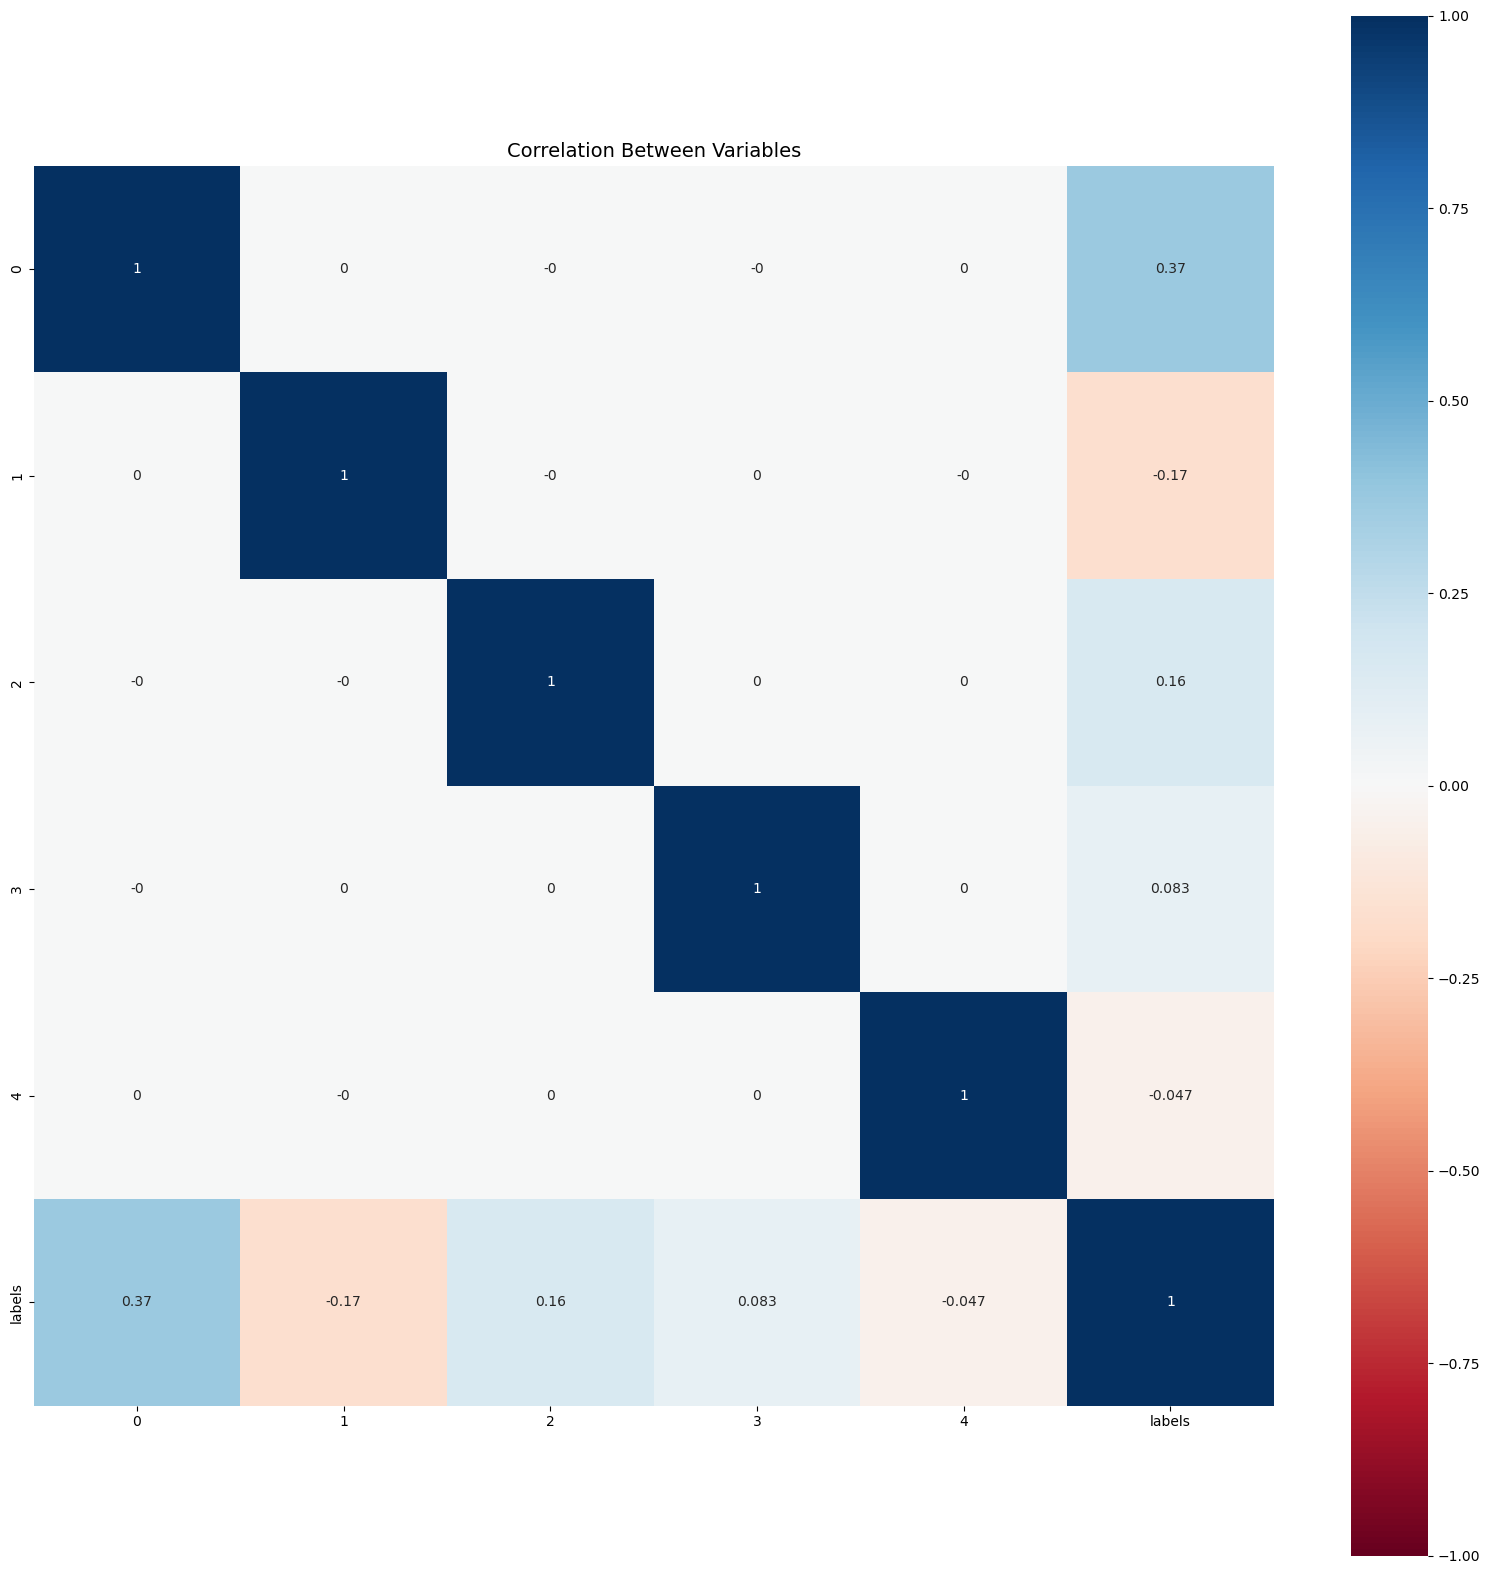

In [79]:
correlation_metrics=X_reduced_pca.corr().round(3)
fig = plt.figure(figsize=(20,20))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

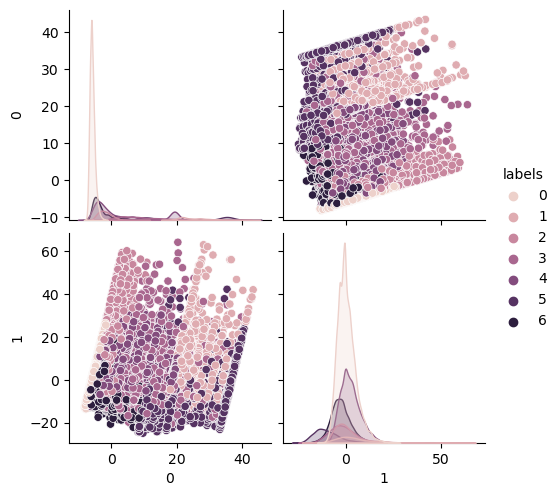

In [82]:
sns.pairplot(X_reduced_pca, vars=["0","1"], hue="labels")

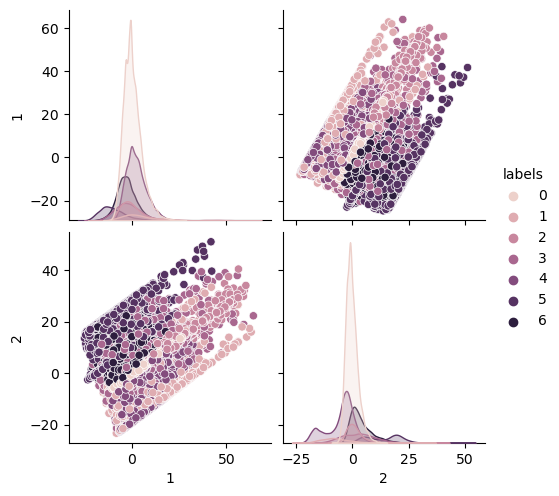

In [84]:
sns.pairplot(X_reduced_pca, vars=["1","2"], hue="labels")

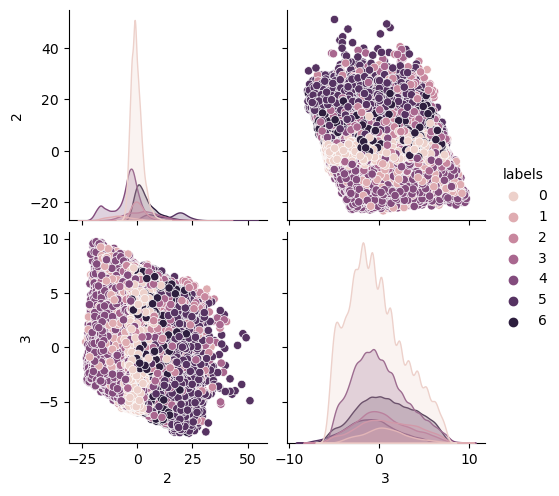

In [85]:
sns.pairplot(X_reduced_pca, vars=["2","3"], hue="labels")

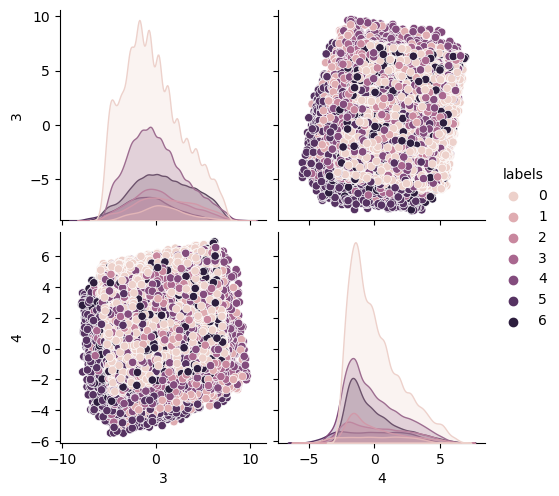

In [88]:
sns.pairplot(X_reduced_pca, vars=["3","4"], hue="labels")

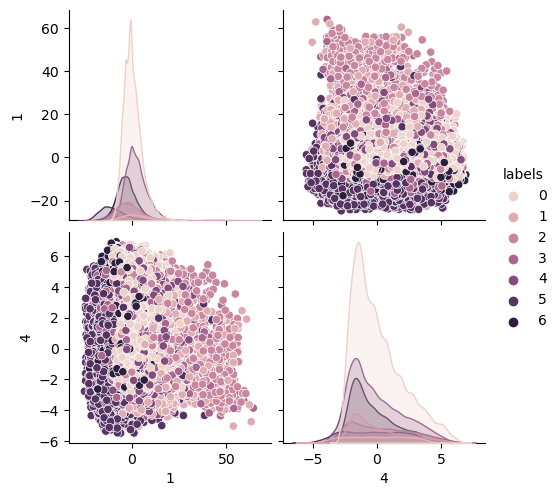

In [87]:
sns.pairplot(X_reduced_pca, vars=["1","4"], hue="labels")

### GMM on ICA output 

In [89]:
 # read data from the file and plot 
filename = os.path.join(outdir, f"reduced_diabetes_ica.csv" )    
X_reduced_ica = pd.read_csv(filename)

In [90]:
X_reduced_ica.shape

(183824, 3)

In [91]:
X_reduced_pca.head()

0          1          2         3         4  labels
0  -6.337444  -1.447461  -1.190457  1.415162 -1.590803       0
1   8.935548 -19.853925  17.217871 -3.792815 -1.287537       5
2  19.521195   6.765617 -15.496631 -2.456653 -3.654196       4
3  -7.328086  -8.367197  -5.098674  0.553206 -0.736349       0
4  -5.793849  -0.442184  -1.030759 -2.254799  1.987619       0

In [ ]:
bic=[]
aic =[]
k_range = range(2,10)
for i in k_range:
    gmm_temp = GaussianMixture(n_components=i, n_init=10)
    gmm_temp.fit(X_reduced_ica)
    bic.append(gmm_temp.bic(X_reduced_ica))
    aic.append(gmm_temp.aic(X_reduced_ica))

fig1 = plt.figure(figsize = (5,4))
plt.plot(k_range, bic, marker='o', label = "BIC Curve")
plt.plot(k_range, aic, marker='x', label = "AIC Curve")
plt.xlabel("Number of Clusters ")
plt.legend()
plt.show()


In [93]:
gmm = GaussianMixture(n_components=7, n_init=10)
gmm.fit(X_reduced_ica)

labels = gmm.predict(X_reduced_ica)

X_reduced_ica['labels'] = labels
gmm.converged_


True

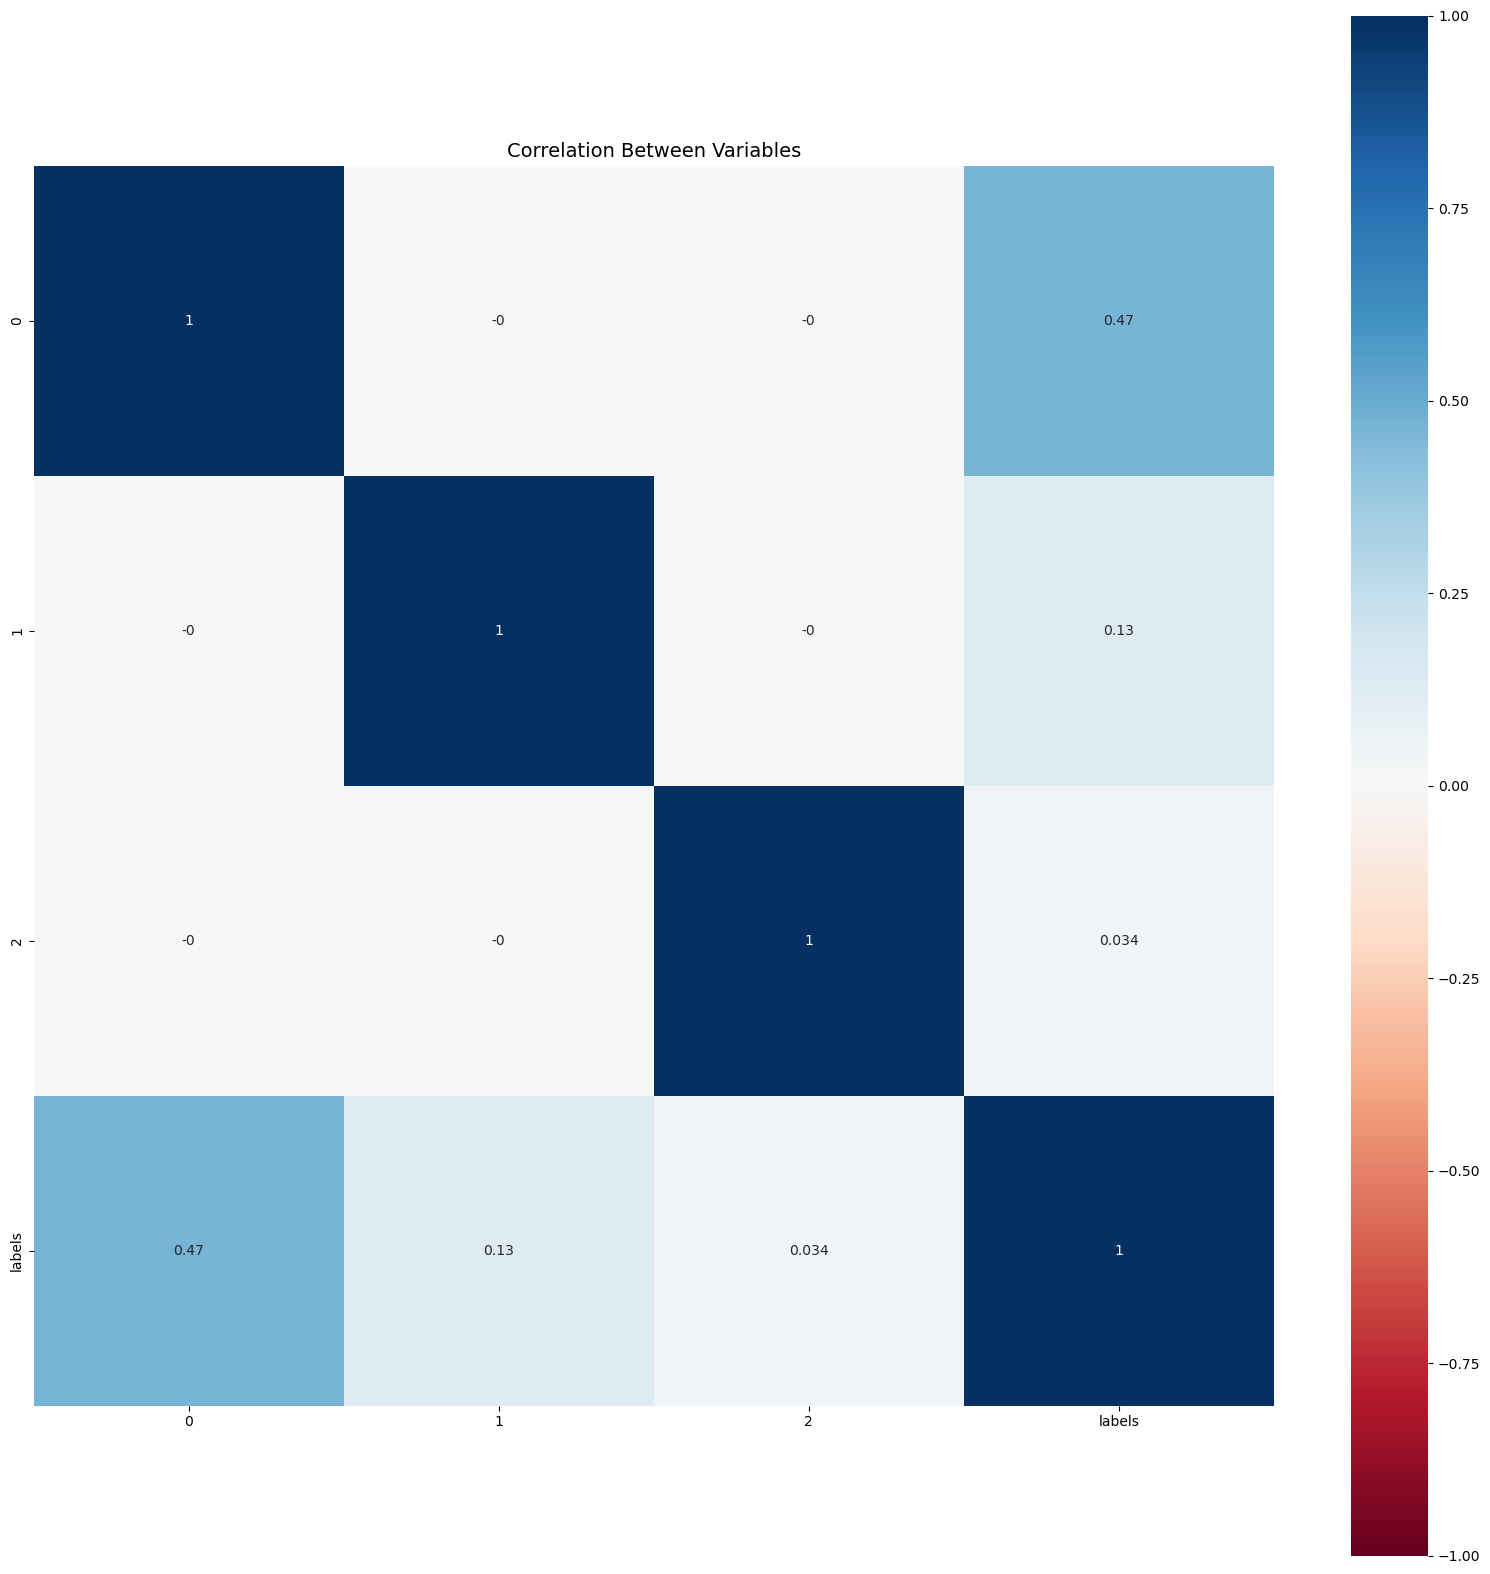

In [94]:
correlation_metrics=X_reduced_ica.corr().round(3)
fig = plt.figure(figsize=(20,20))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()


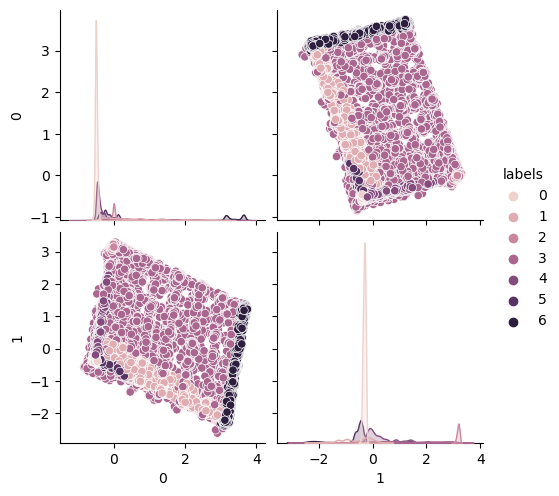

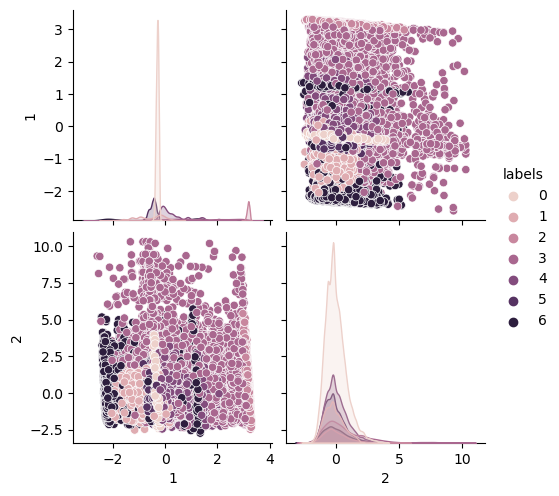

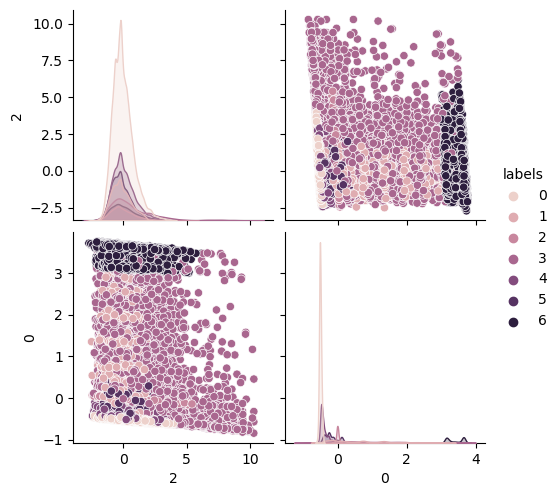

In [96]:

sns.pairplot(X_reduced_ica, vars=["0","1"], hue="labels")
sns.pairplot(X_reduced_ica, vars=["1","2"], hue="labels")
sns.pairplot(X_reduced_ica, vars=["2","0"], hue="labels")

In [97]:
gmm_filename_ica = os.path.join(outdir, f"gmm_diabetese_trained_ica.joblib" ) 
dump(gmm, gmm_filename_ica)

['./data/processed_data\\gmm_diabetese_trained_ica.joblib']

###  GMM on Manifold output 

In [3]:
 # read data from the file and plot 
filename = os.path.join(outdir, f"reduced_diabetes_lle.csv" )    
X_reduced_lle = pd.read_csv(filename)

X_reduced_lle.shape


(20000, 10)

In [4]:
X_reduced_lle.head()

0         1         2         3         4         5         6  \
0 -0.004330  0.000283  0.001931 -0.002964  0.001534  0.003536  0.005352   
1 -0.002280 -0.001827 -0.000134  0.000602  0.000836 -0.002183  0.001456   
2 -0.000548  0.002077 -0.006762  0.009346  0.000691  0.002363  0.002845   
3 -0.001182 -0.002523 -0.000698 -0.000144 -0.001522  0.000210 -0.001065   
4 -0.007806  0.001575 -0.005041  0.003860 -0.000627  0.006778 -0.002331   

          7         8         9  
0  0.008611 -0.004763  0.004263  
1 -0.000168 -0.003609 -0.000429  
2  0.001106 -0.003255 -0.006320  
3  0.003321 -0.004701  0.002693  
4  0.010150  0.001763  0.004709

In [5]:
gmm = GaussianMixture(n_components=7, n_init=10)
gmm.fit(X_reduced_lle)

labels = gmm.predict(X_reduced_lle)

X_reduced_lle['labels'] = labels
gmm.converged_


True

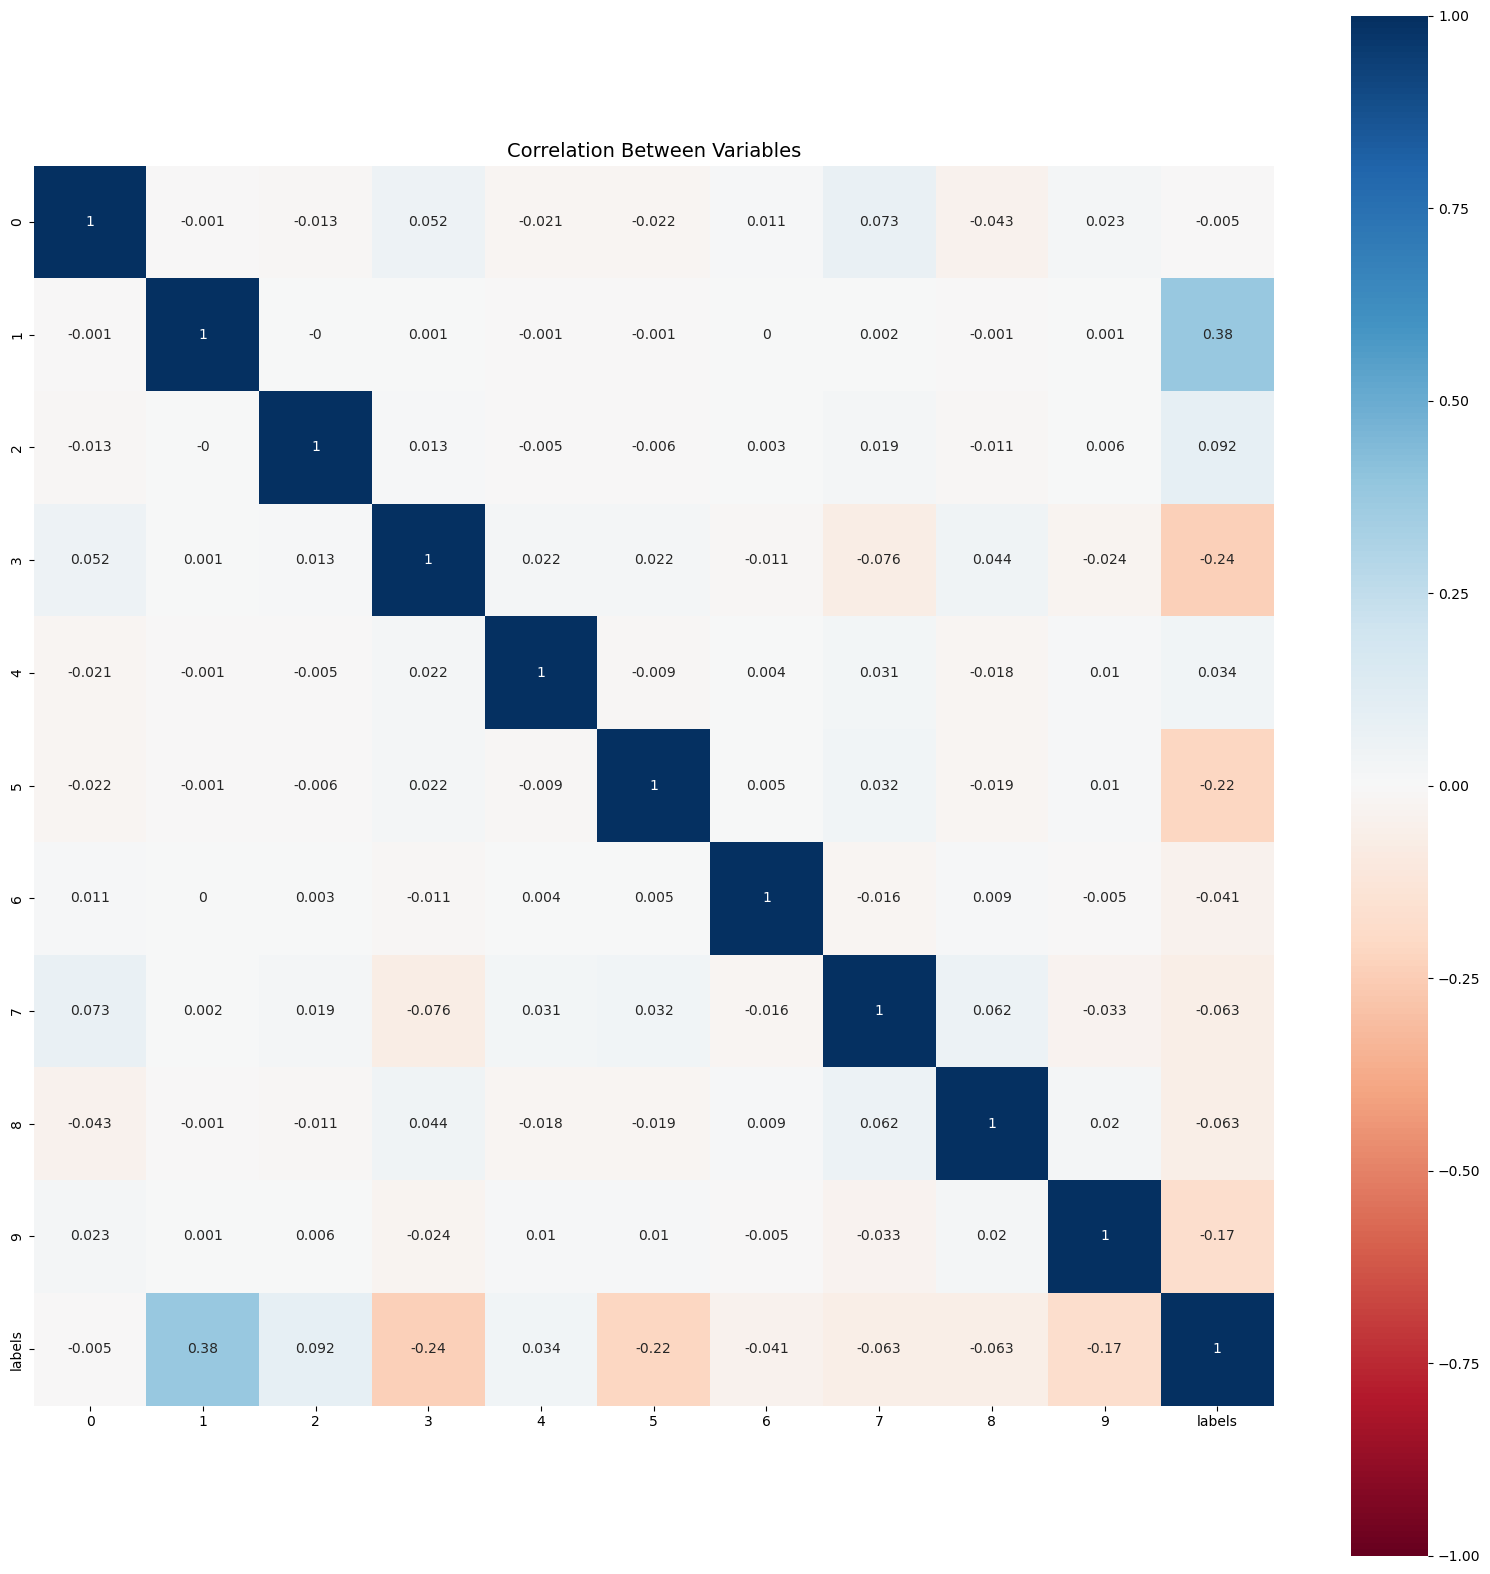

In [102]:
correlation_metrics=X_reduced_lle.corr().round(3)
fig = plt.figure(figsize=(20,20))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

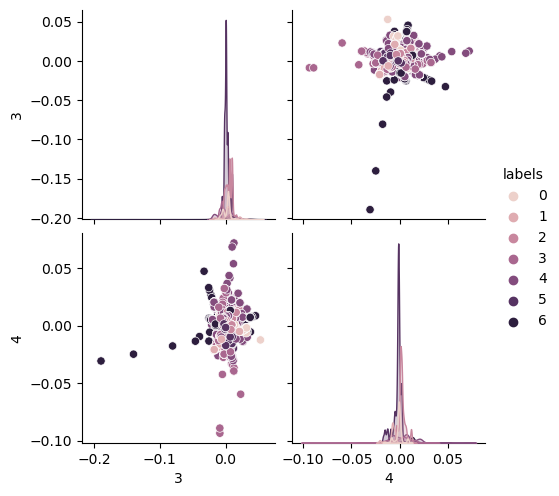

In [7]:
sns.pairplot(X_reduced_lle, vars=["3","4"], hue="labels")

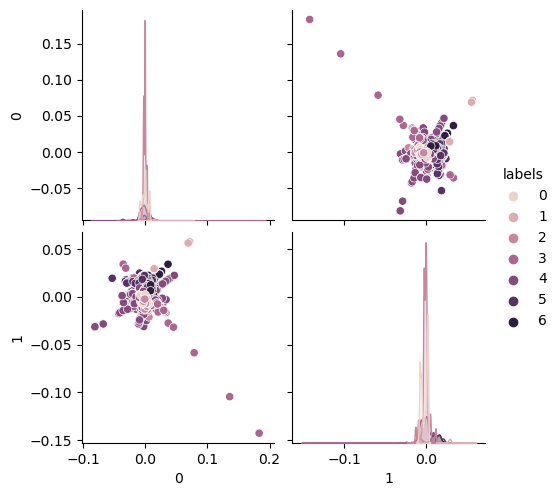

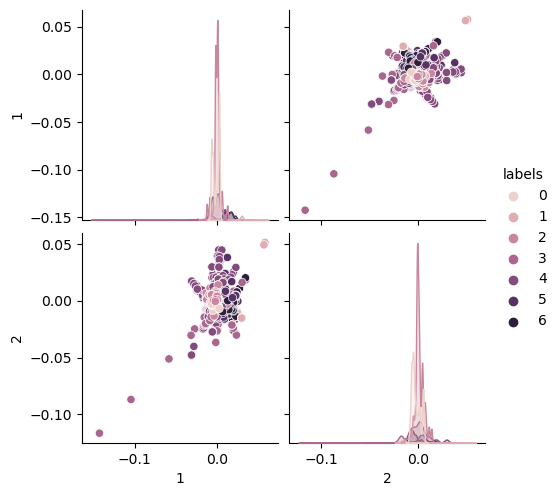

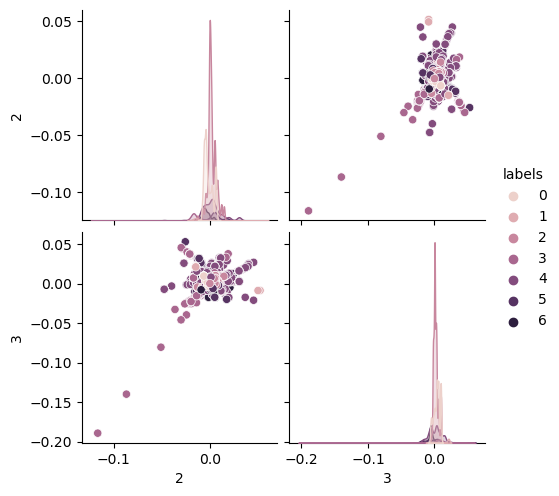

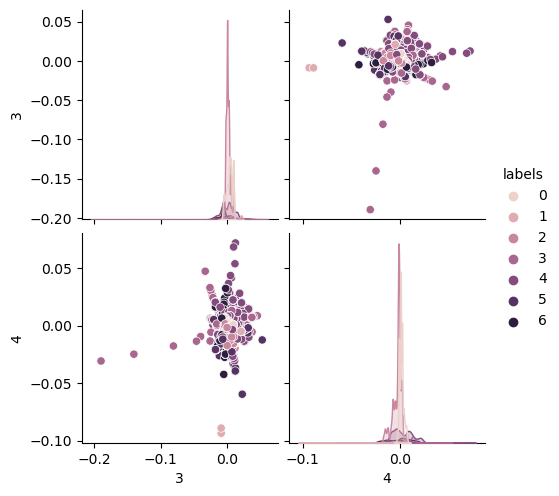

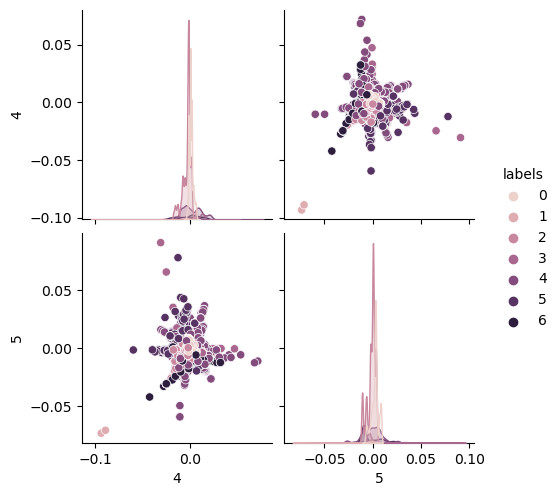

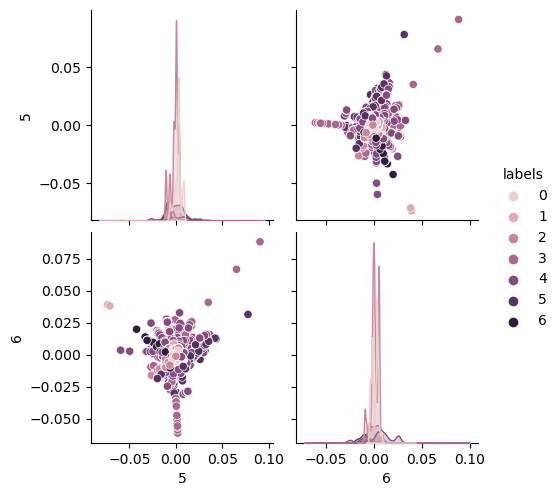

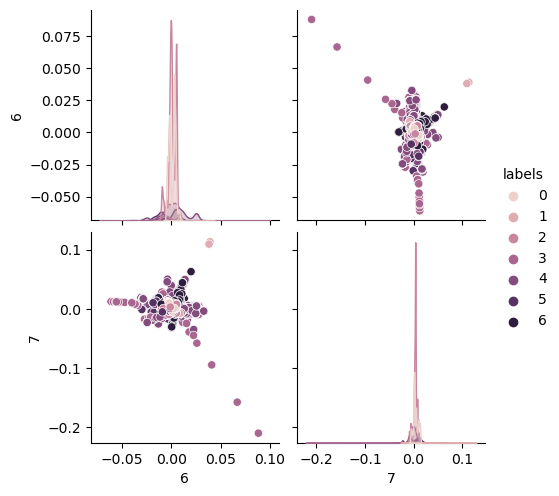

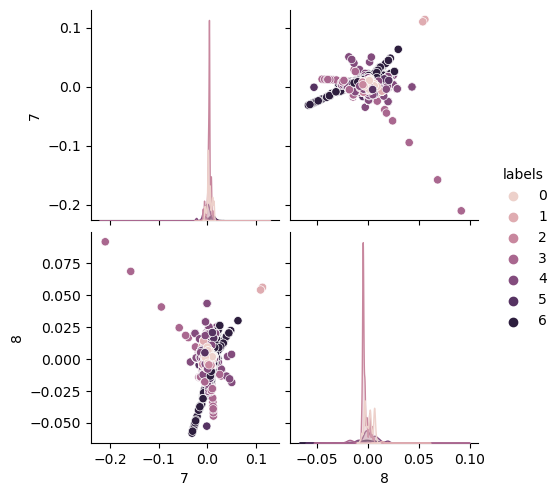

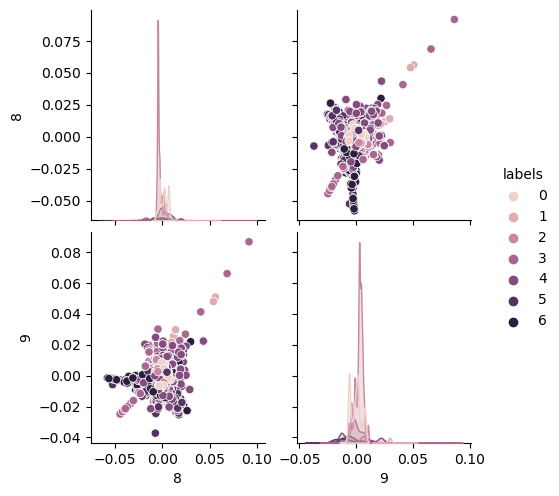

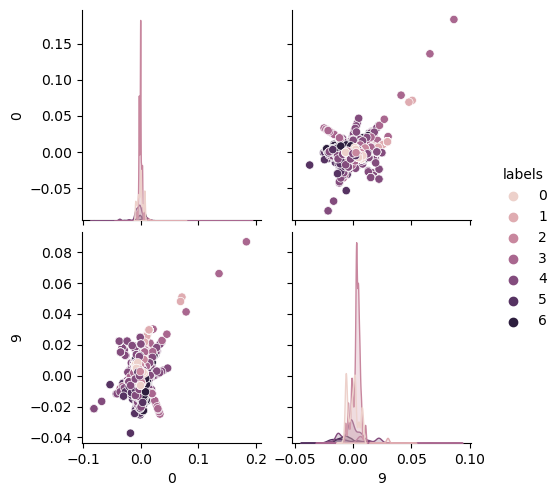

In [103]:
sns.pairplot(X_reduced_lle, vars=["0","1"], hue="labels")
sns.pairplot(X_reduced_lle, vars=["1","2"], hue="labels")
sns.pairplot(X_reduced_lle, vars=["2","3"], hue="labels")
sns.pairplot(X_reduced_lle, vars=["3","4"], hue="labels")
sns.pairplot(X_reduced_lle, vars=["4","5"], hue="labels")
sns.pairplot(X_reduced_lle, vars=["5","6"], hue="labels")
sns.pairplot(X_reduced_lle, vars=["6","7"], hue="labels")
sns.pairplot(X_reduced_lle, vars=["7","8"], hue="labels")
sns.pairplot(X_reduced_lle, vars=["8","9"], hue="labels")
sns.pairplot(X_reduced_lle, vars=["0","9"], hue="labels")


In [104]:
gmm_filename_lle = os.path.join(outdir, f"gmm_diabetese_trained_lle.joblib" ) 
dump(gmm, gmm_filename_lle)

['./data/processed_data\\gmm_diabetese_trained_lle.joblib']

## KMode Algorithm

In [107]:
from kmodes.kmodes import KModes

### Kmodes on PCA reduced dataset

In [136]:
 # read data from the file and plot 
filename = os.path.join(outdir, f"reduced_diabetes_pca.csv" )    
X_diabetes_reduced_pca = pd.read_csv(filename)

In [137]:
X_diabetes_reduced_pca.shape

(183824, 5)

In [138]:
X_diabetes_reduced_pca.head()

0          1          2         3         4
0  -6.337444  -1.447461  -1.190457  1.415162 -1.590803
1   8.935548 -19.853925  17.217871 -3.792815 -1.287537
2  19.521195   6.765617 -15.496631 -2.456653 -3.654196
3  -7.328086  -8.367197  -5.098674  0.553206 -0.736349
4  -5.793849  -0.442184  -1.030759 -2.254799  1.987619

### Train KMode for clusters 

In [139]:
kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X_diabetes_reduced_pca)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 919085.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 919085.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 919085.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 919085.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 919085.0
Best run was number 1


In [140]:
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [141]:
kmode

KModes(init='random', n_clusters=5, n_init=5, verbose=1)

In [142]:
cluster_centers_indices = kmode.cluster_centroids_ 
n_clusters = 5


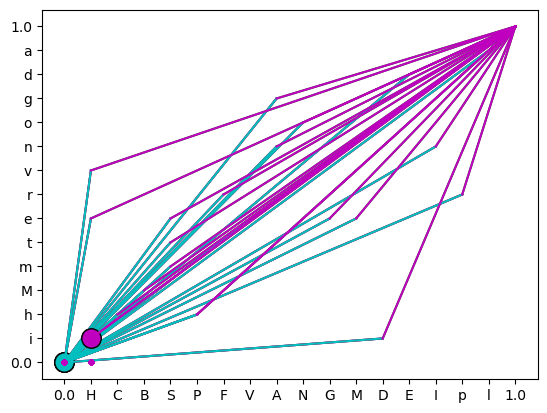

In [144]:

from itertools import cycle
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

for k, col in zip(range(n_clusters), colors):
    class_members = clusters 
    cluster_center = cluster_centers_indices[k]
    plt.plot(X_train.iloc[class_members, 0], X_train.iloc[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X_train.iloc[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

In [143]:
X_diabetes_reduced_pca['kmode_labels'] = clusters

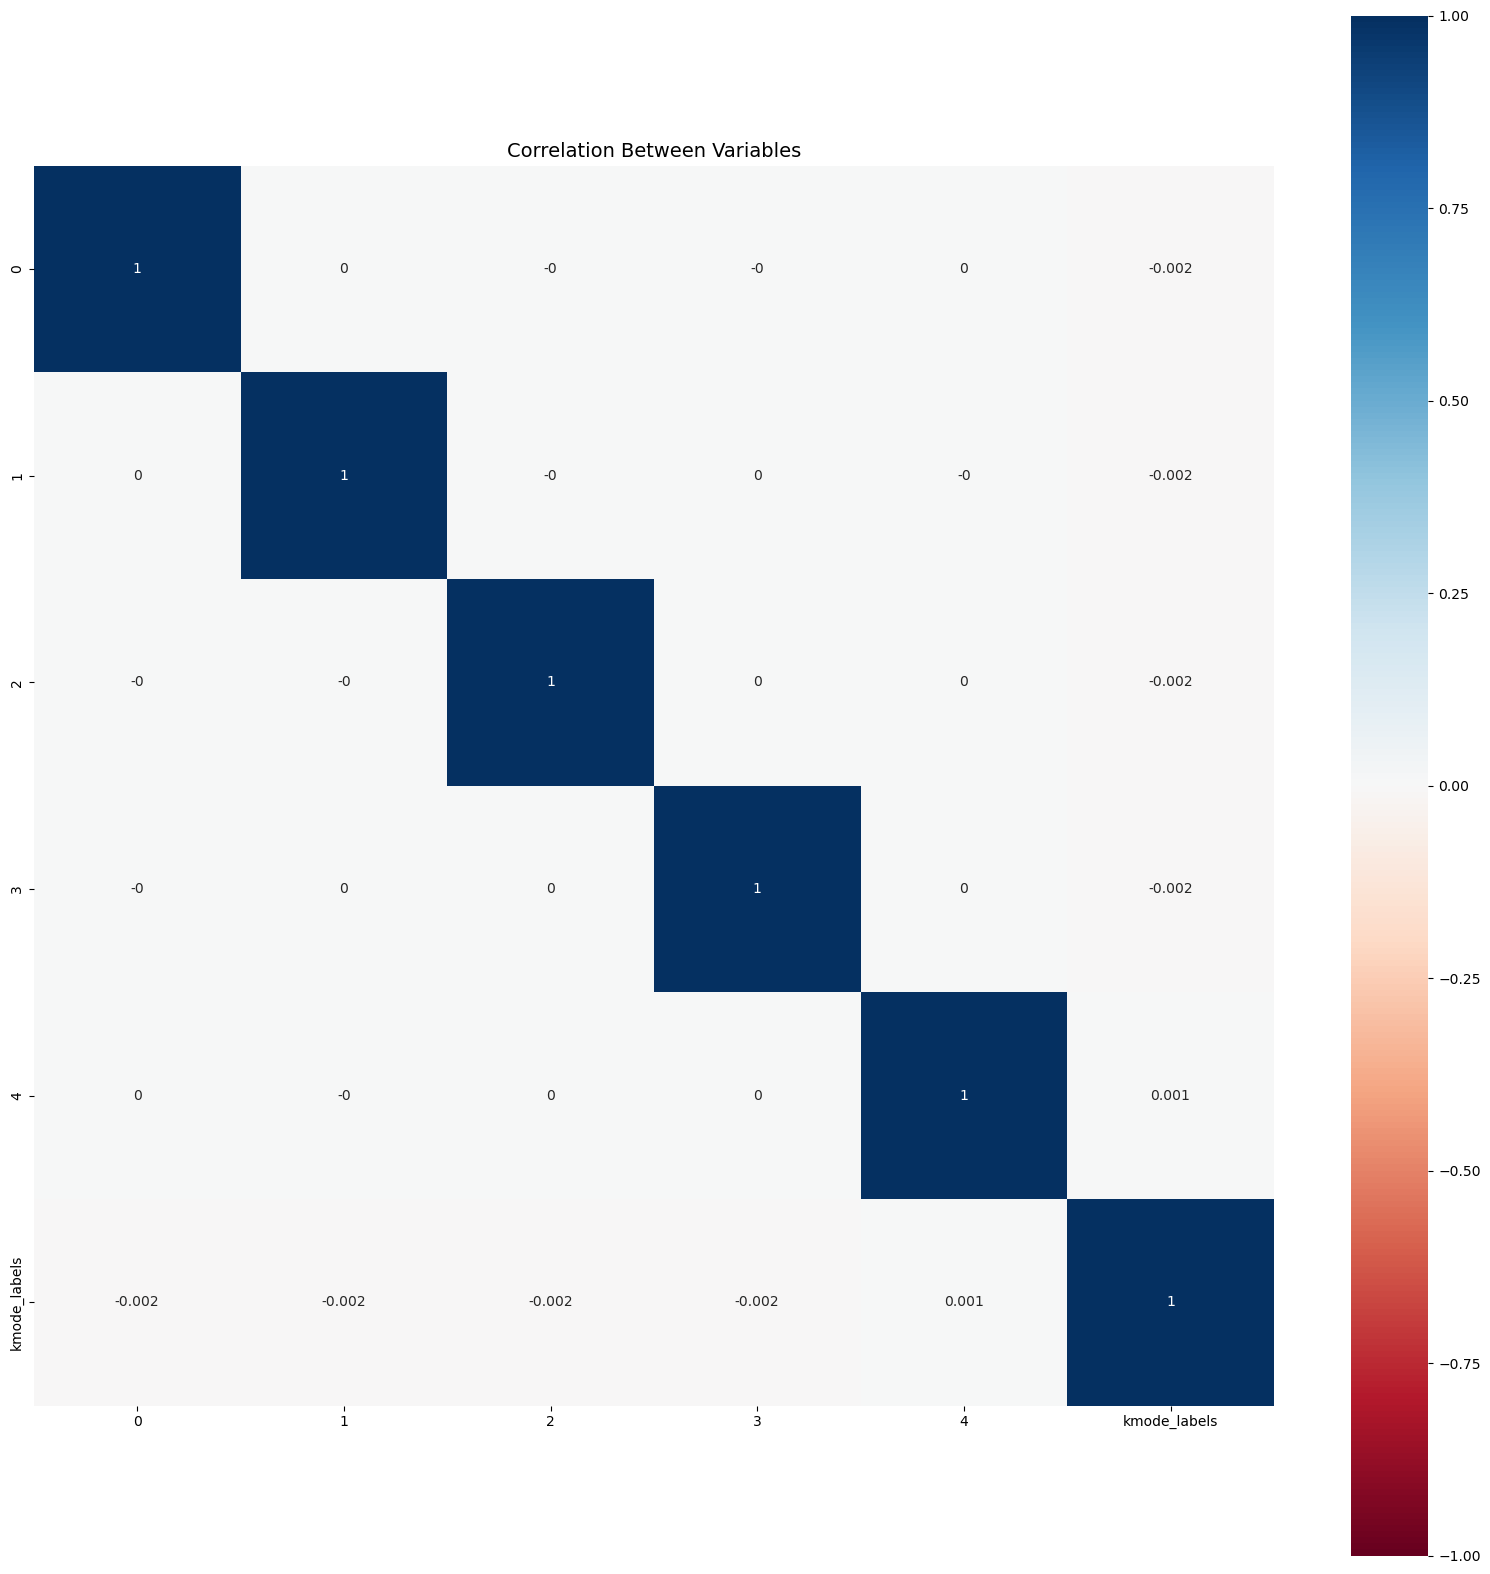

In [144]:
correlation_metrics=X_diabetes_reduced_pca.corr().round(3)
fig = plt.figure(figsize=(20,20))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

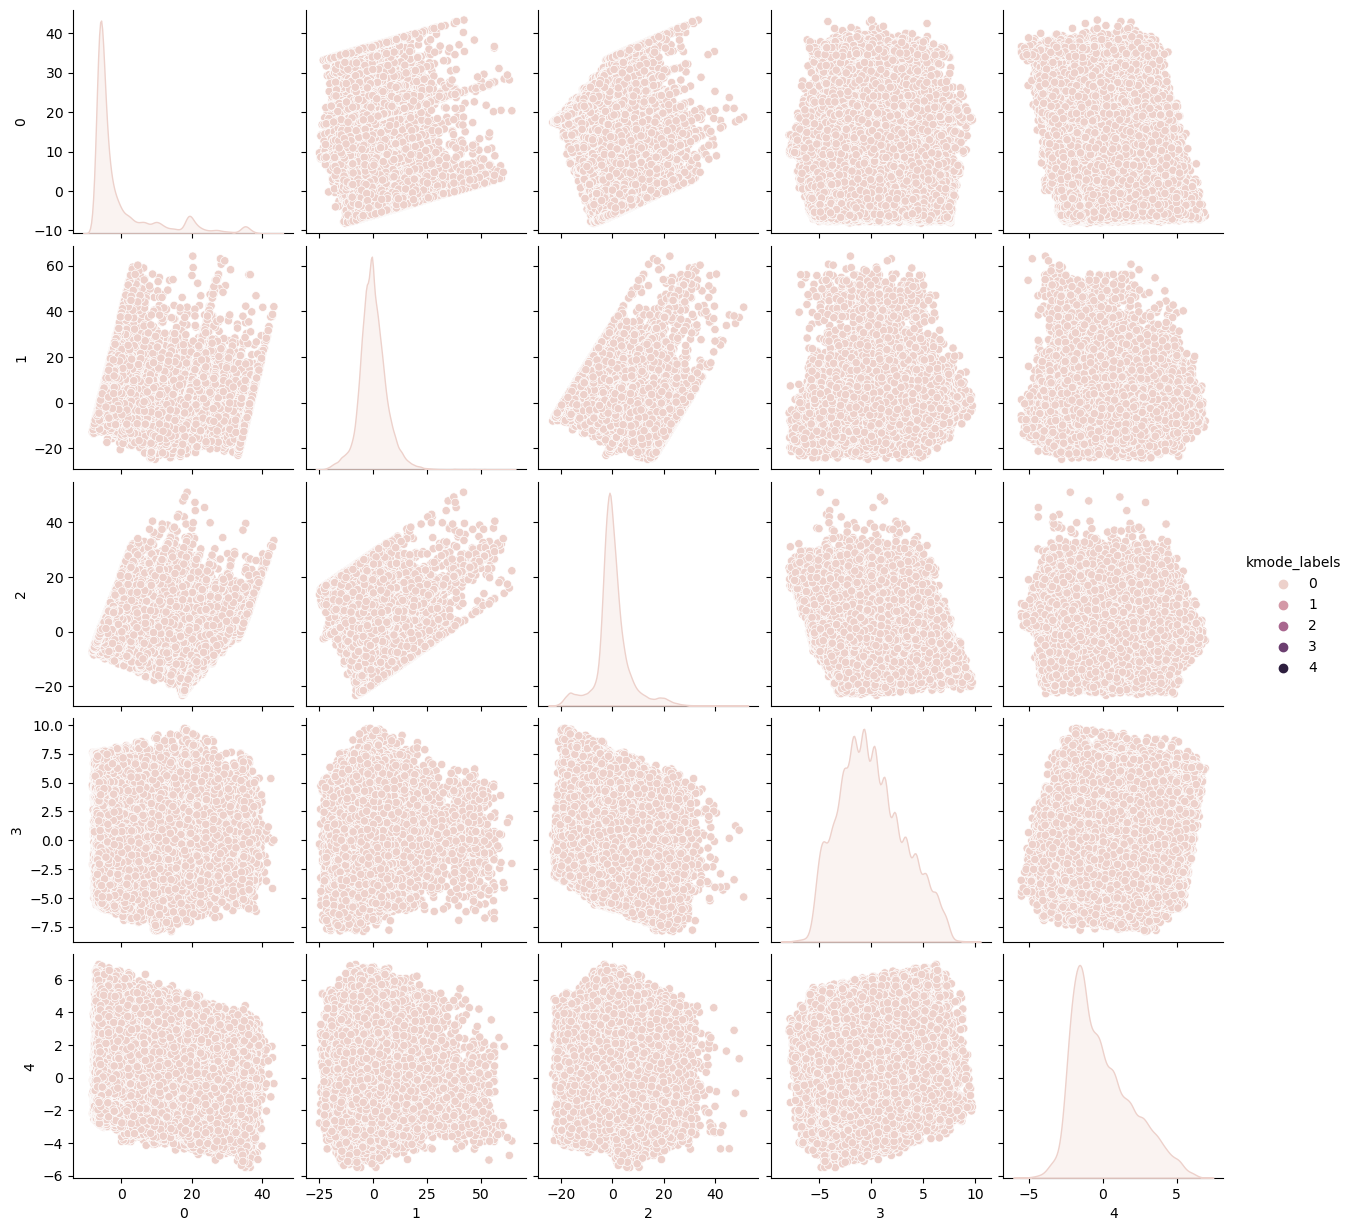

In [145]:
sns.pairplot(X_diabetes_reduced_pca, hue="kmode_labels" )

In [146]:
kmodes_filename_pca = os.path.join(outdir, f"kmodes_diabetese_trained_pca.joblib" ) 
dump(kmode, kmodes_filename_pca)

['./data/processed_data\\kmodes_diabetese_trained_pca.joblib']

### Kmodes on ica reduced dataset 

In [123]:
# read data from the file and plot 
filename = os.path.join(outdir, f"reduced_diabetes_ica.csv" )    
X_ins_reduced_ica = pd.read_csv(filename)


In [125]:
kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X_ins_reduced_ica)

X_ins_reduced_ica['kmode_labels'] = clusters
clusters.shape

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 551455.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 551455.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 551455.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 551455.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 551455.0
Best run was number 1


(183824,)

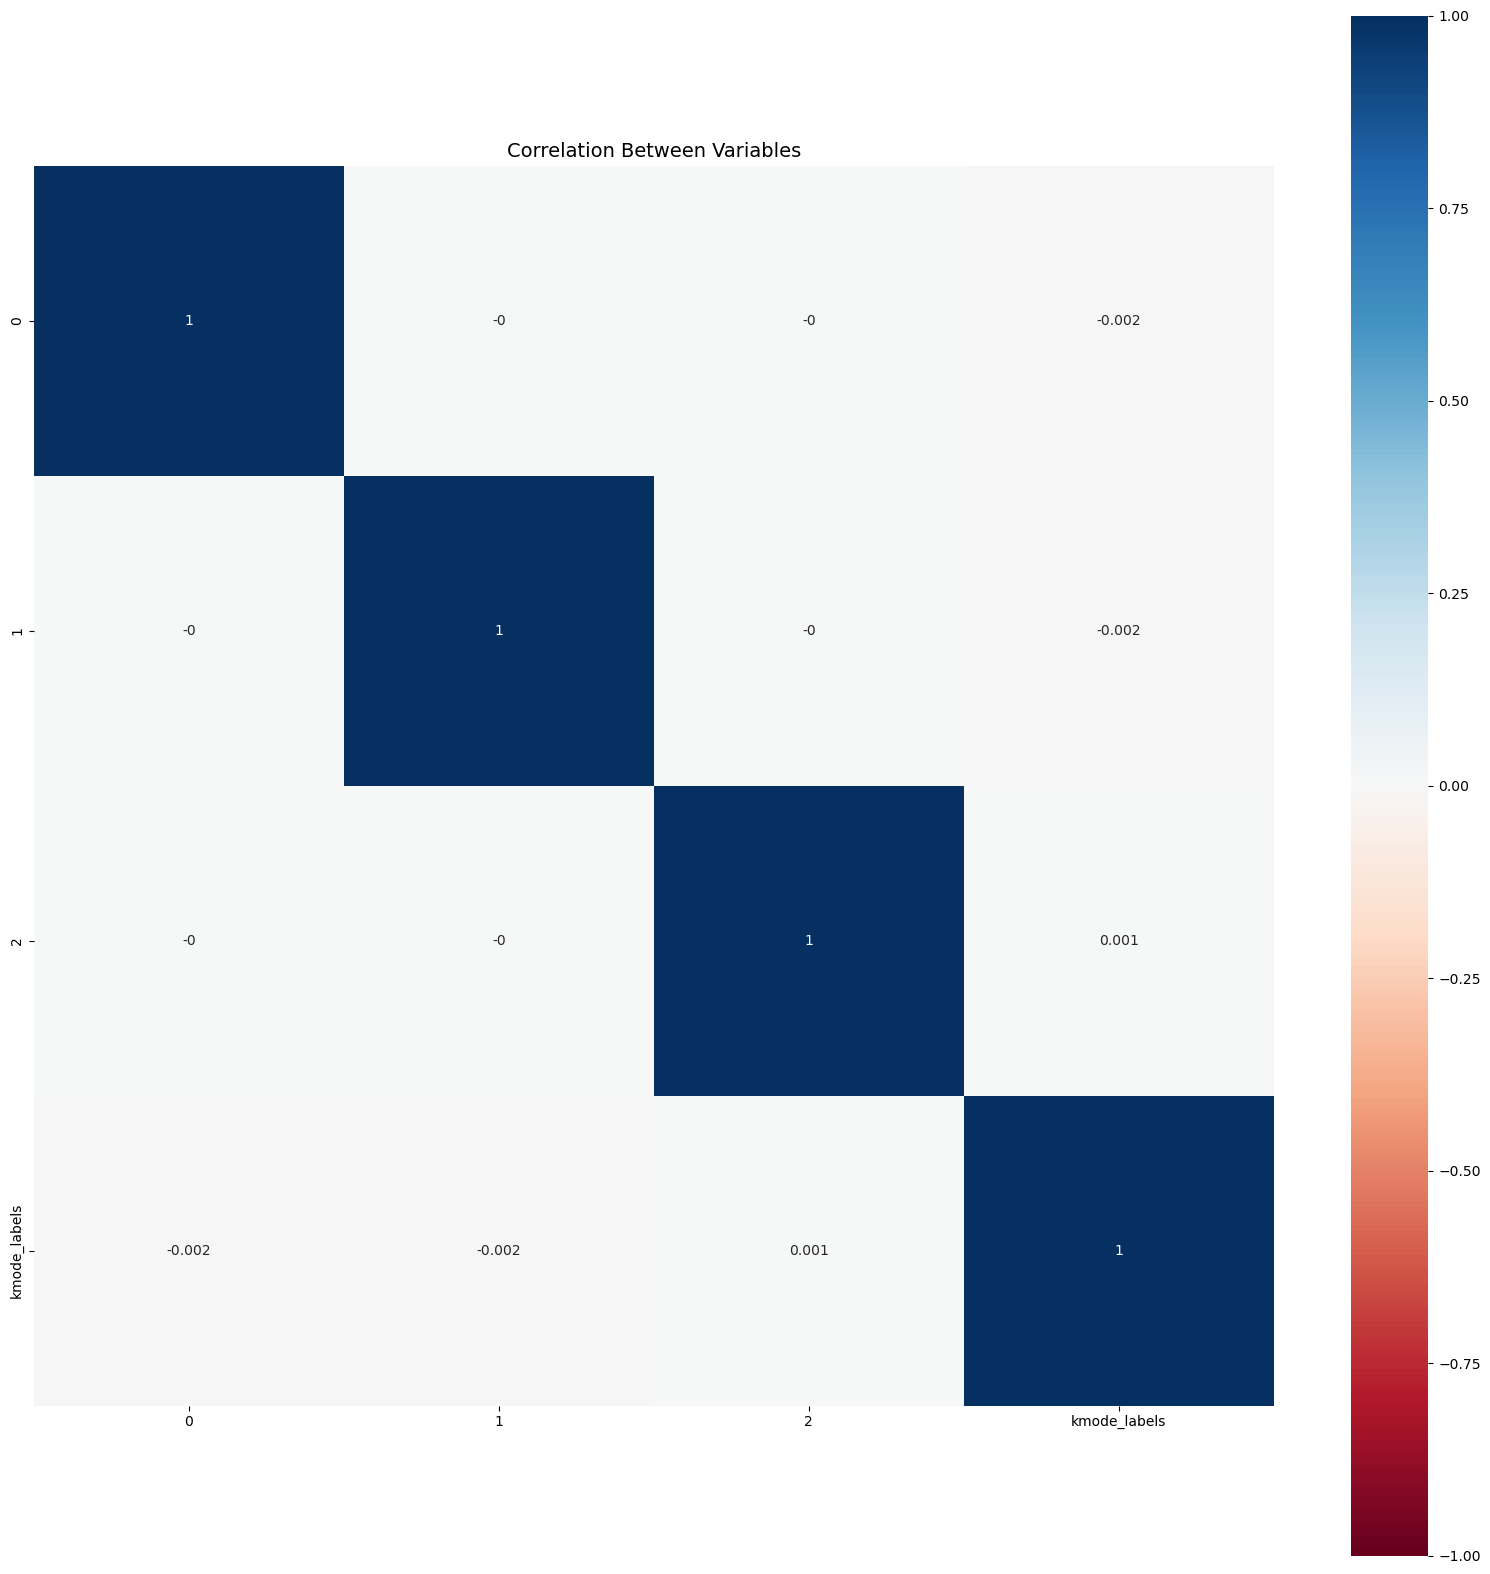

In [133]:
correlation_metrics=X_ins_reduced_ica.corr().round(3)
fig = plt.figure(figsize=(20,20))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

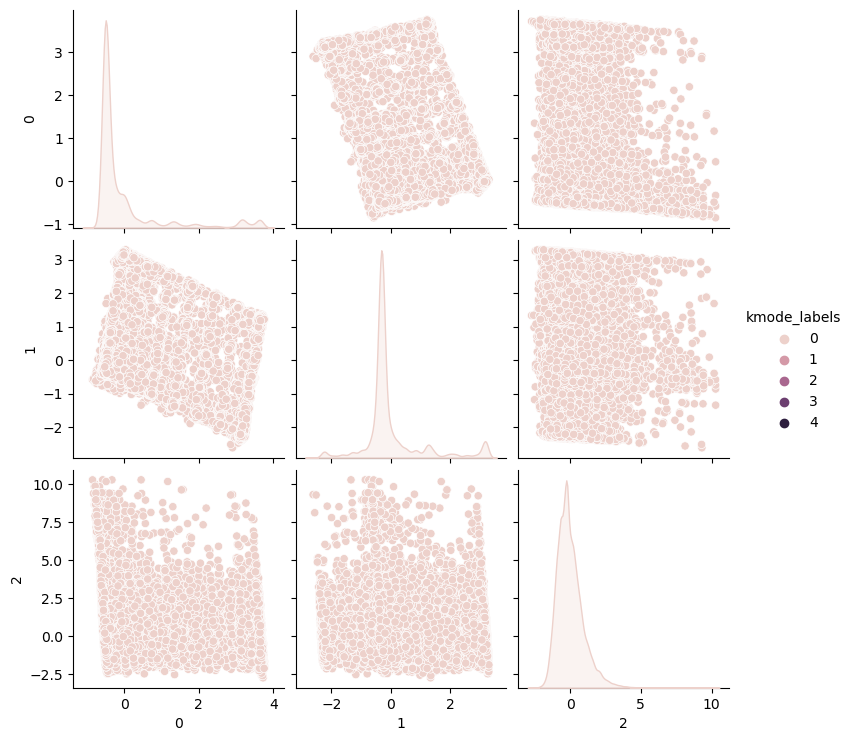

In [126]:
sns.pairplot(X_ins_reduced_ica, hue="kmode_labels" )

In [128]:
kmodes_filename_ica = os.path.join(outdir, f"kmodes_diabetese_trained_ica.joblib" ) 
dump(kmode, kmodes_filename_ica)

['./data/processed_data\\kmodes_diabetese_trained_ica.joblib']

### Kmodes on Manifold Reduxced dataset

In [129]:
### Kmodes on lle reduced dataset 

# read data from the file and plot 
filename = os.path.join(outdir, f"reduced_diabetes_lle.csv" )    
X_ins_reduced_lle = pd.read_csv(filename)


In [130]:
kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X_ins_reduced_lle)
X_ins_reduced_lle['kmode_labels'] = clusters



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 199918.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 199916.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 199918.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 199918.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 199918.0
Best run was number 2


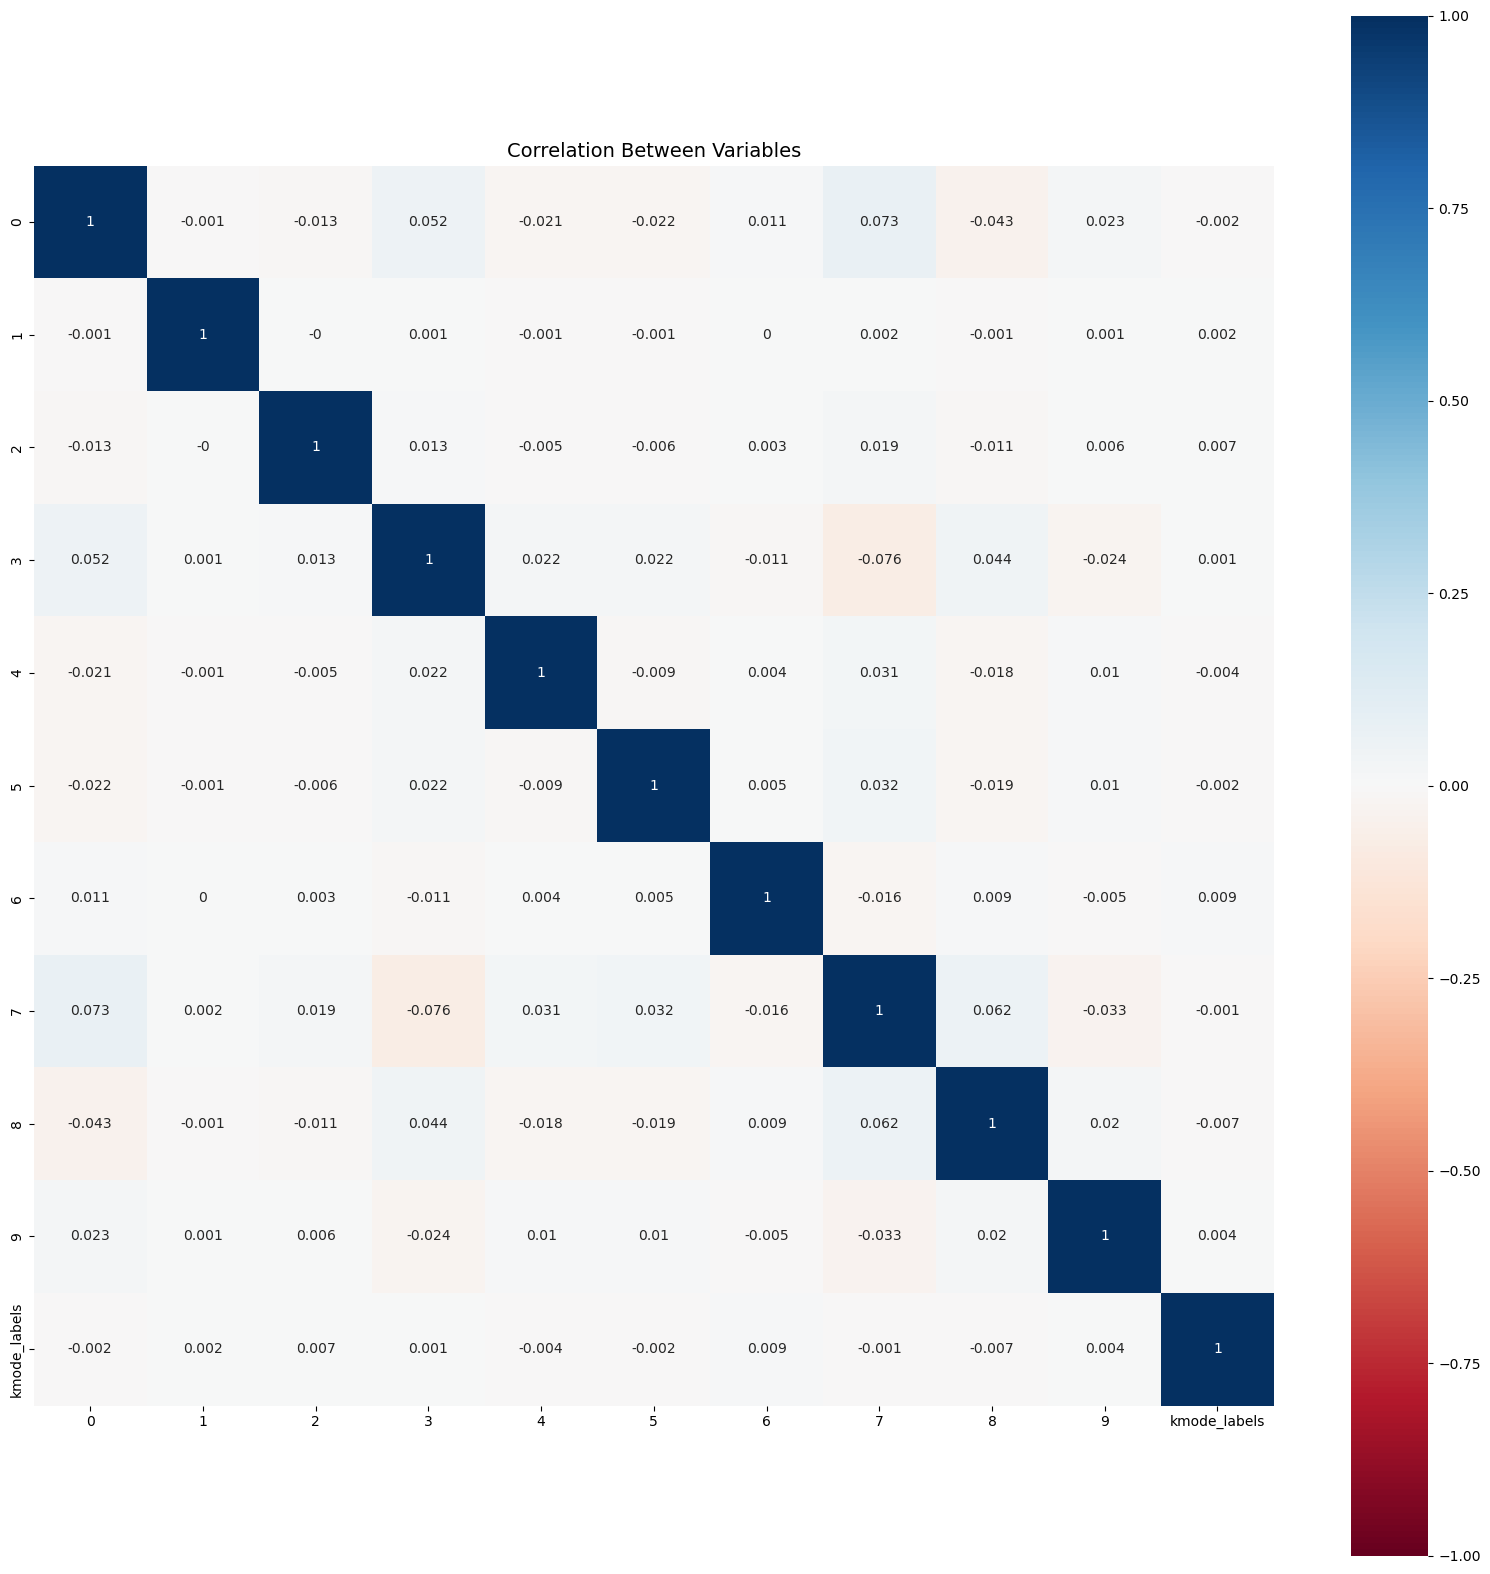

In [134]:
correlation_metrics=X_ins_reduced_lle.corr().round(3)
fig = plt.figure(figsize=(20,20))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

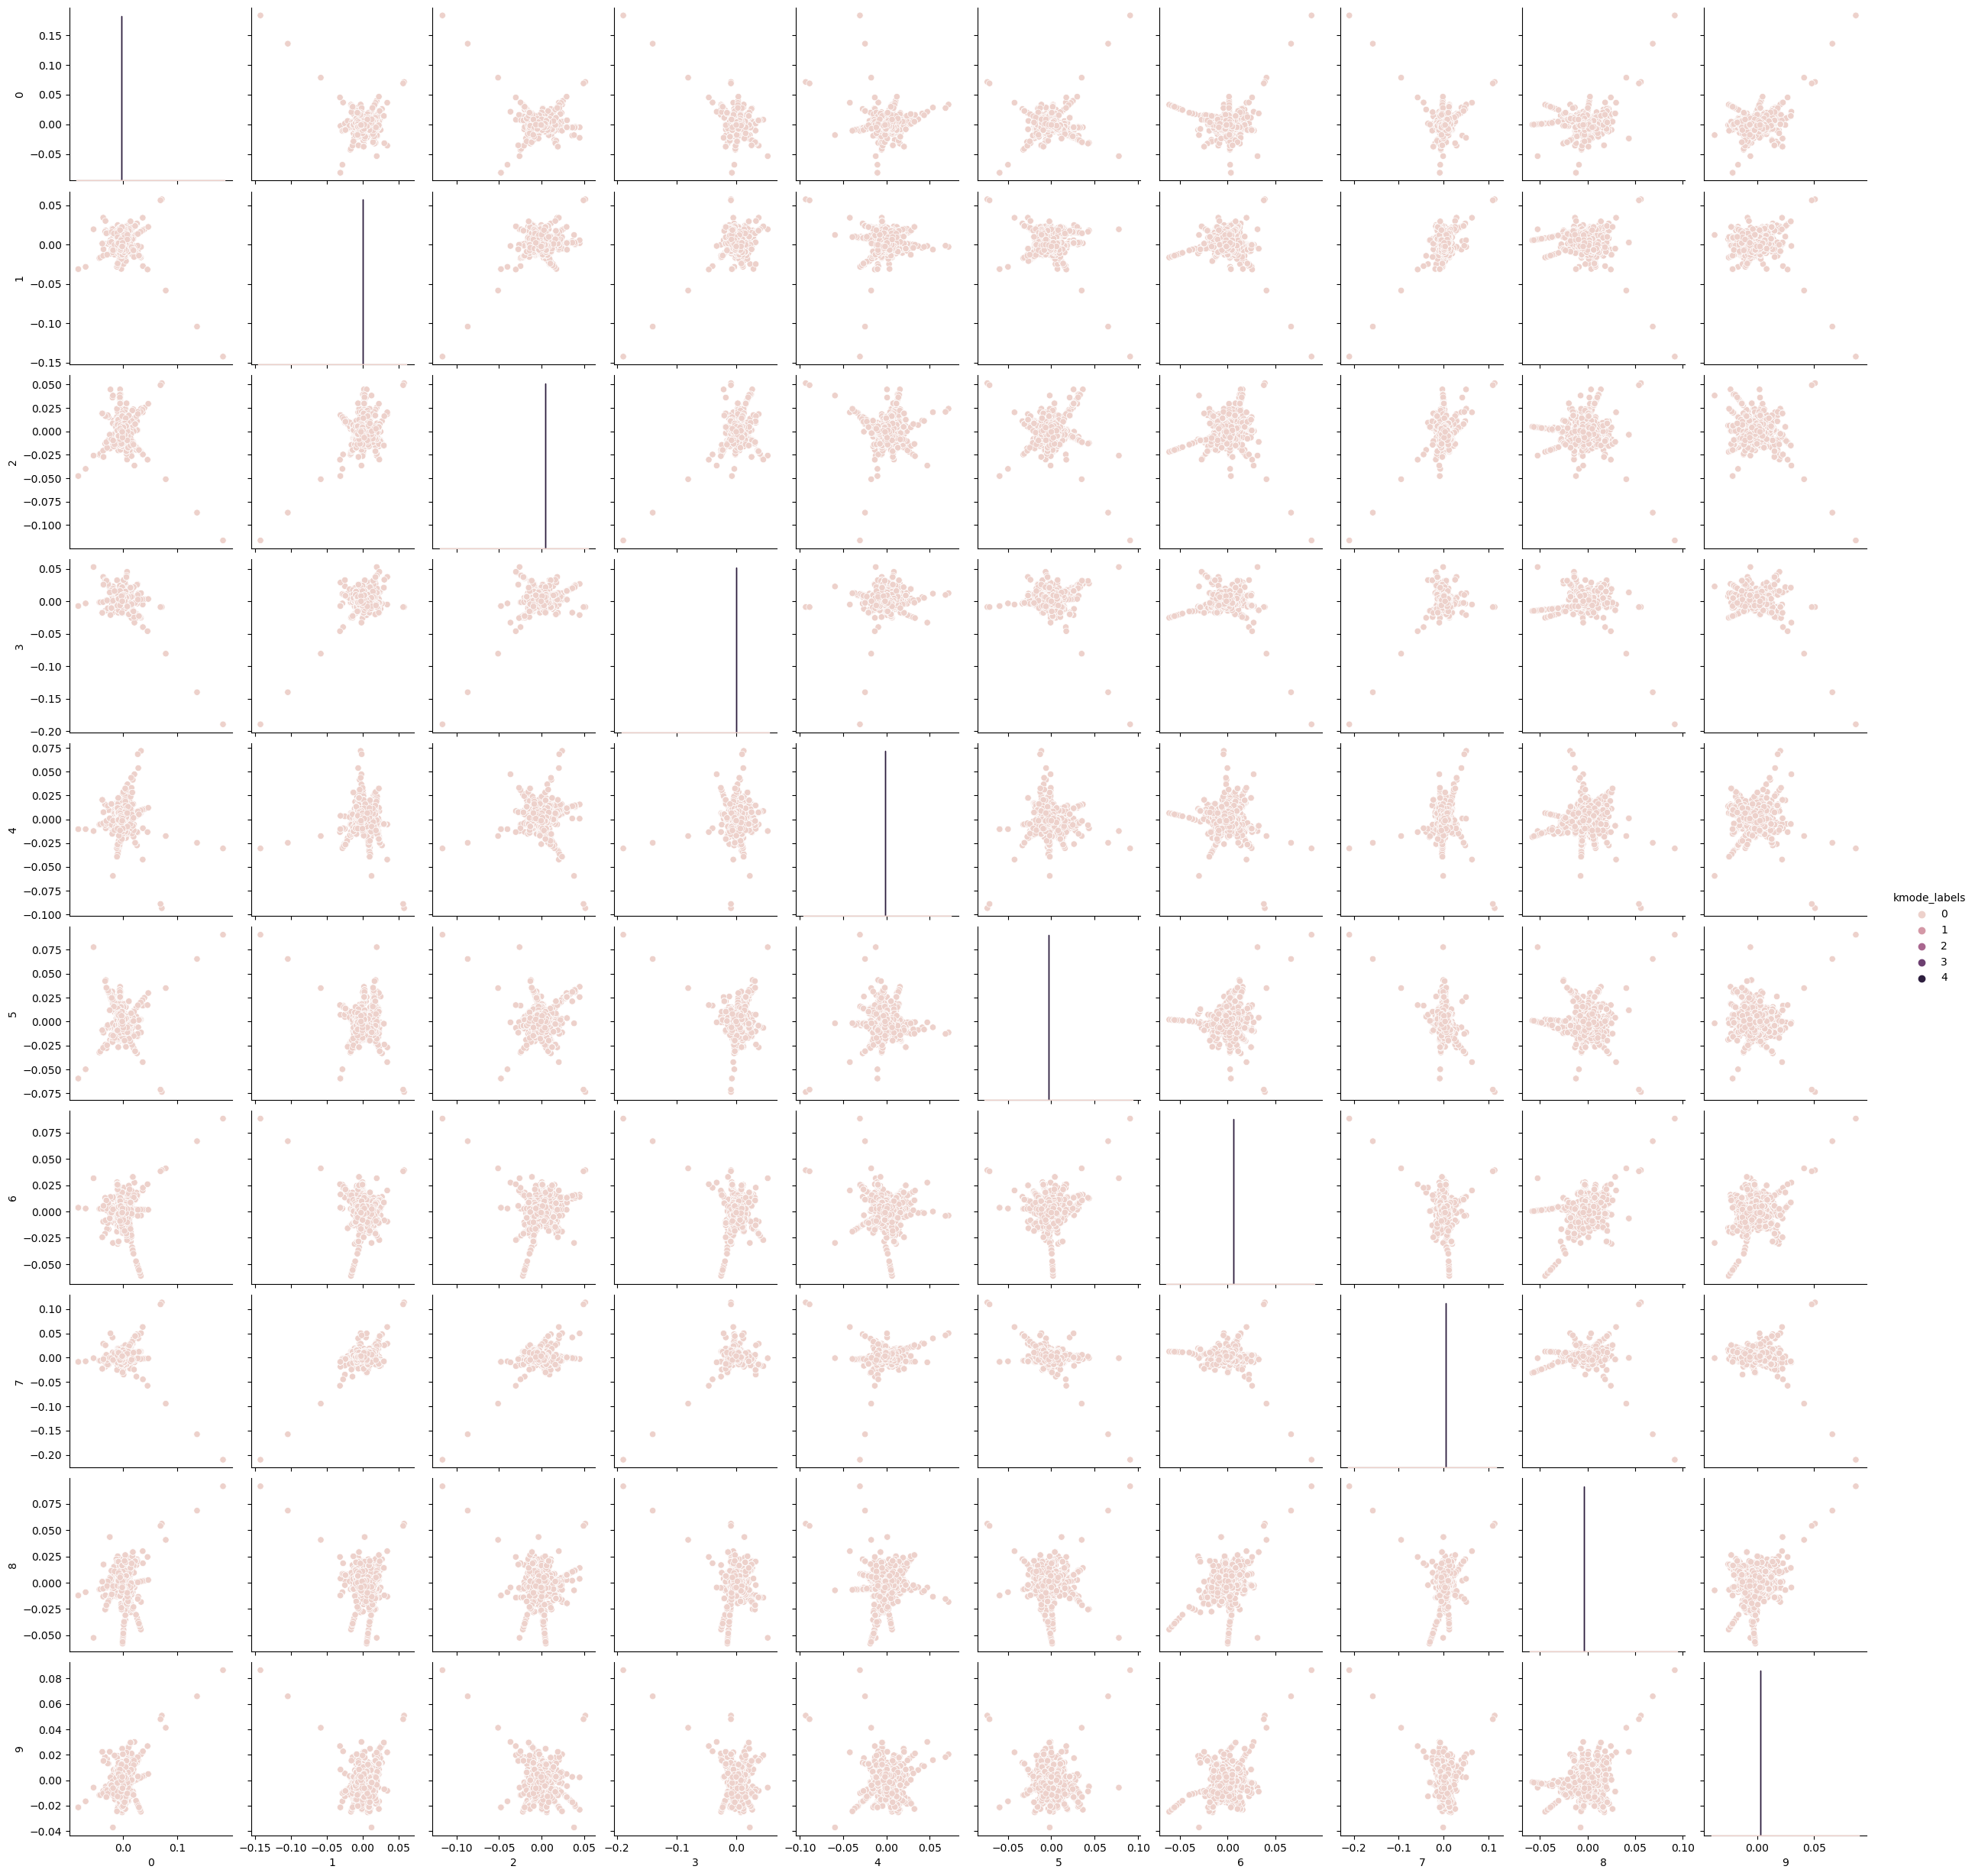

In [131]:
sns.pairplot(X_ins_reduced_lle, hue="kmode_labels" )

In [135]:
kmodes_filename_lle = os.path.join(outdir, f"kmodes_diabetese_trained_lle.joblib" ) 
dump(kmode, kmodes_filename_lle)

['./data/processed_data\\kmodes_diabetese_trained_lle.joblib']